<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/notebooks/(colab)canhealth_cnn_learnerv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
!pip3 install torch===1.3.1 torchvision===0.4.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch===1.3.1 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+c

In [6]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 146 (delta 29), reused 17 (delta 8), pack-reused 85 (from 1)
Receiving objects: 100% (146/146), 215.19 MiB | 14.67 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Updating files: 100% (20/20), done.


In [7]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/train/
   creating: /content/cannabis-health-diagnosis/data/valid/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
   creating: /content/cannabis-health-diagnosis/data/test/Botrytis/
   creating: /content/cannabis-health-diagnosis/data/test/Dehydration/
   creating: /content/cannabis-health-diagnosis/data/test/Healthy/
   creating: /content/cannabis-health-diagnosis/data/test/Leaf Miners/
   creating: /content/cannabis-health-diagnosis/data/test/Nitrogen Deficiency/
   creating: /content/cannabis-health-diagnosis/data/test/Nutrient Burn/
   creating: /content/cannabis-health-diagnosis/data/test/Overwatering/
   creating: /content/cannabis-health-diagnosis/data/test/PH Fluctuation/
   creating: /content/cannabis-health-diagnosis/data/test/Phosphorus Deficiency/
   creating: /content/cannabis-health-diagnos

In [8]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
!apt-get install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package torch=
E: Unable to locate package torchvision=
E: Unable to locate package https://download.pytorch.org/whl
E: Couldn't find any package by glob 'https://download.pytorch.org/whl'
E: Couldn't find any package by regex 'https://download.pytorch.org/whl'


In [14]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.all import imagenet_stats, ClassificationInterpretation
from fastai.metrics import error_rate, accuracy
from fastai.vision.data import ImageDataLoaders
import gdown

In [15]:
# Defining the path to the data
data_path = '/content/cannabis-health-diagnosis/data'

In [16]:
batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)]

In [23]:
# Loading the image-based dataset
img_data = ImageDataLoaders.from_folder(path=data_path, train='train', valid='valid', ds_tfms=batch_tfms, size=128, bs=56)

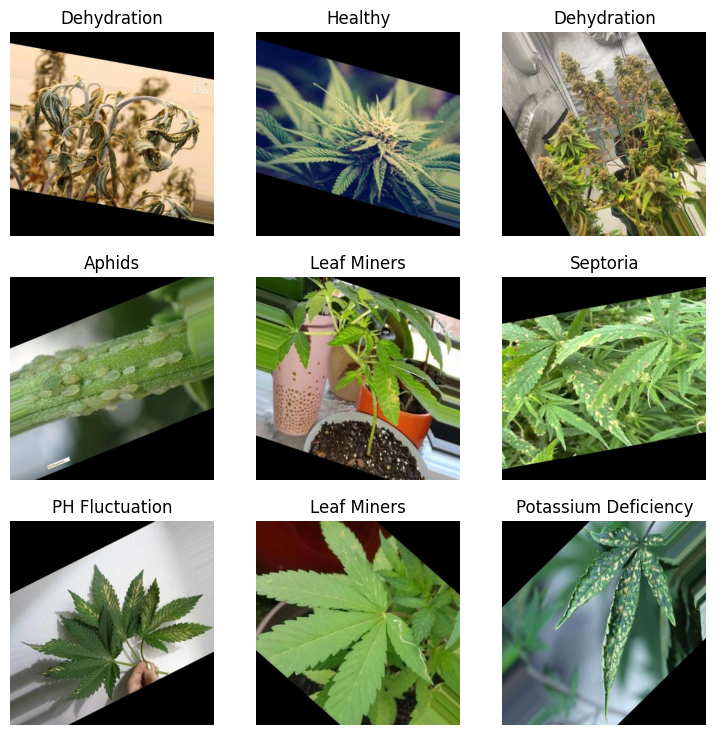

In [18]:
img_data.show_batch()

In [24]:
model = vision_learner(img_data, models.resnet50, metrics=[accuracy, error_rate])

In [28]:
model.summary()

OutOfMemoryError: CUDA out of memory. Tried to allocate 28.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 9.06 MiB is free. Process 3719 has 14.74 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 62.73 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [26]:
model.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 9.06 MiB is free. Process 3719 has 14.74 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 62.73 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.056982,2.078774,0.515385,0.484615,00:20
1,0.050937,2.141627,0.511538,0.488462,00:20
2,0.040723,2.195405,0.507692,0.492308,00:20
3,0.035136,2.187711,0.511538,0.488462,00:20
4,0.030842,2.191627,0.511538,0.488462,00:20


In [ ]:
model.save('cnn_learner_12cycles')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.pth')

In [ ]:
model.save('cnn_learner_12cycles.h5')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.h5.pth')

In [ ]:
interpret = ClassificationInterpretation.from_learner(model)

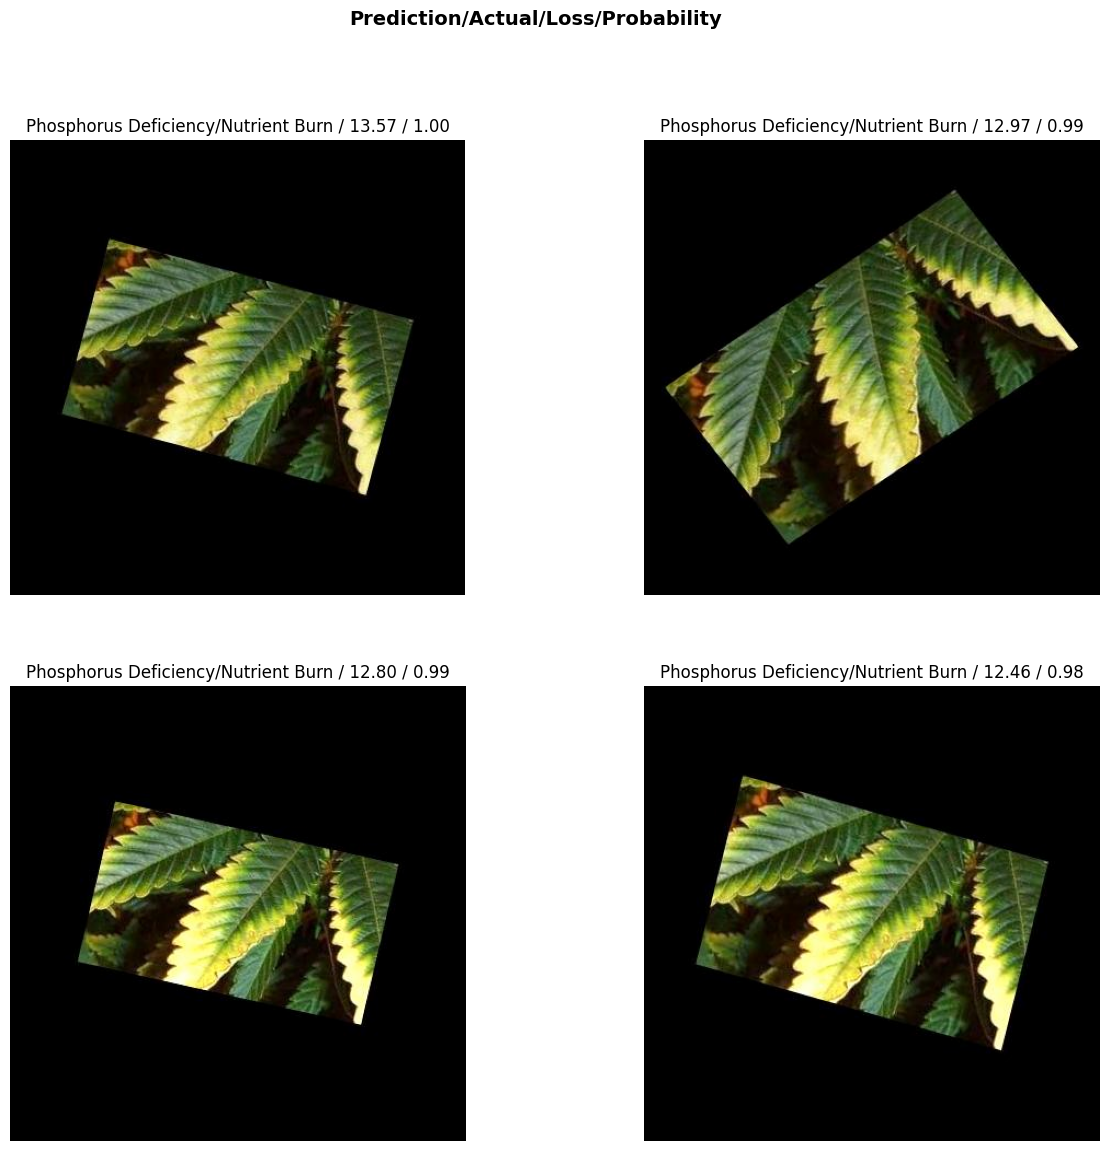

In [ ]:
interpret.plot_top_losses(4, figsize=(15, 13))

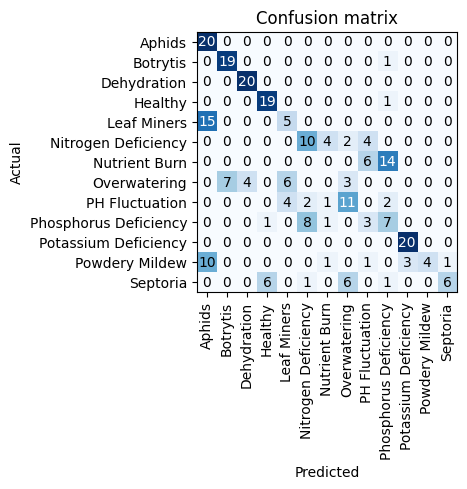

In [ ]:
interpret.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.004365158267319202)

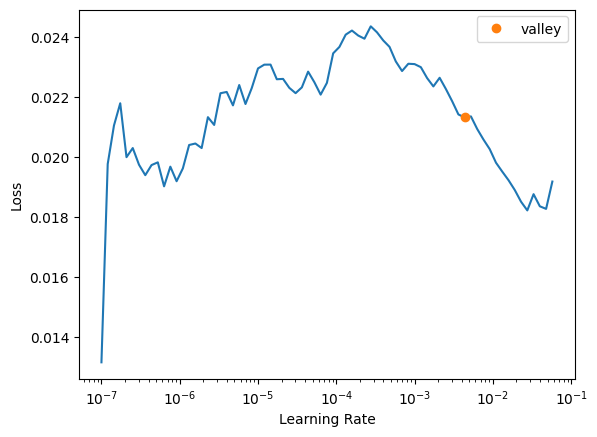

In [ ]:
model.lr_find()

In [ ]:
model.unfreeze()
model.fit_one_cycle(3, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.086790,3644.769775,0.111538,0.888462,00:27
1,1.081750,72.414055,0.076923,0.923077,00:27
2,0.731208,2.920332,0.465385,0.534615,00:25


In [ ]:
model.unfreeze()
model.fit_one_cycle(5, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.194535,8.531229,0.211538,0.788462,00:29
1,0.377305,18.780676,0.180769,0.819231,00:26
2,0.337254,8.802637,0.353846,0.646154,00:25
3,0.247680,4.244514,0.526923,0.473077,00:25
4,0.176186,3.399903,0.496154,0.503846,00:26


In [ ]:
model.save('models/cnn_learner_lr8cycles')

In [ ]:
model.save('modelsh5/cnn_learner_lr8cycles.h5')

SuggestedLRs(valley=0.002511886414140463)

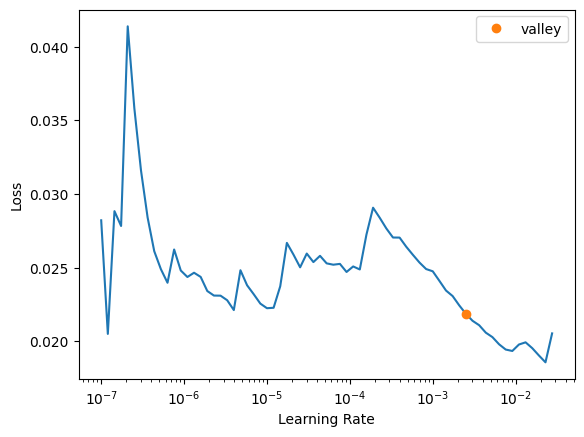

In [ ]:
model.freeze()
model.lr_find()

In [ ]:
lr = 1e-3/2
model.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.044342,3.593268,0.523077,0.476923,00:20
1,0.034671,3.610157,0.538462,0.461538,00:21
2,0.026544,3.595436,0.534615,0.465385,00:20
3,0.019239,3.642842,0.526923,0.473077,00:20
4,0.017110,3.683828,0.523077,0.476923,00:20
5,0.014610,3.670907,0.526923,0.473077,00:20
6,0.012640,3.705325,0.526923,0.473077,00:20
7,0.011103,3.715362,0.526923,0.473077,00:20
8,0.010989,3.744009,0.519231,0.480769,00:20
9,0.009165,3.707028,0.526923,0.473077,00:21


In [ ]:
model.fit_one_cycle(7, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.007321,3.718367,0.519231,0.480769,00:20
1,0.009183,3.747788,0.526923,0.473077,00:20
2,0.008140,3.781843,0.519231,0.480769,00:20
3,0.007324,3.751982,0.519231,0.480769,00:20
4,0.006922,3.784140,0.515385,0.484615,00:21
5,0.007084,3.813313,0.515385,0.484615,00:20
6,0.006418,3.812007,0.515385,0.484615,00:20


In [ ]:
model.unfreeze()
model.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.002523,3.893997,0.519231,0.480769,00:26
1,0.042576,7.114769,0.273077,0.726923,00:26
2,0.076743,8.060145,0.261538,0.738462,00:25
3,0.077701,4.634580,0.488462,0.511538,00:25
4,0.070569,3.885277,0.465385,0.534615,00:26
5,0.059581,3.647324,0.526923,0.473077,00:25
6,0.044861,3.411870,0.530769,0.469231,00:26


In [ ]:
model.unfreeze()
model.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.006984,3.314100,0.526923,0.473077,00:26
1,0.004077,3.243121,0.523077,0.476923,00:26
2,0.004939,3.993638,0.469231,0.530769,00:25
3,0.029060,8.467092,0.211538,0.788462,00:25
4,0.065101,5.639187,0.338462,0.661538,00:25
5,0.061974,5.210704,0.411538,0.588462,00:26
6,0.059854,4.212214,0.461538,0.538462,00:26
7,0.047727,4.390201,0.496154,0.503846,00:25
8,0.037543,3.725633,0.496154,0.503846,00:26
9,0.028903,4.034068,0.500000,0.500000,00:25


In [ ]:
model.save('cnn_learner_final')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_final.pth')

In [ ]:
model.save('cnn_learner_final.h5')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_final.h5.pth')

In [ ]:
model.load('cnn_learner_final')

In [ ]:
model.export('export_resnet34_model.pkl')

In [ ]:
!zip -r /content/fastairestnet.zip /content/cannabis-health-diagnosis/data/models

  adding: content/cannabis-health-diagnosis/data/models/ (stored 0%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.h5.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_final.h5.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/export_resnet34_model.pkl (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_final.pth (deflated 7%)


In [ ]:
from google.colab import files
files.download("/content/tuned_cnn_learner.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
interpret1 = ClassificationInterpretation.from_learner(model)

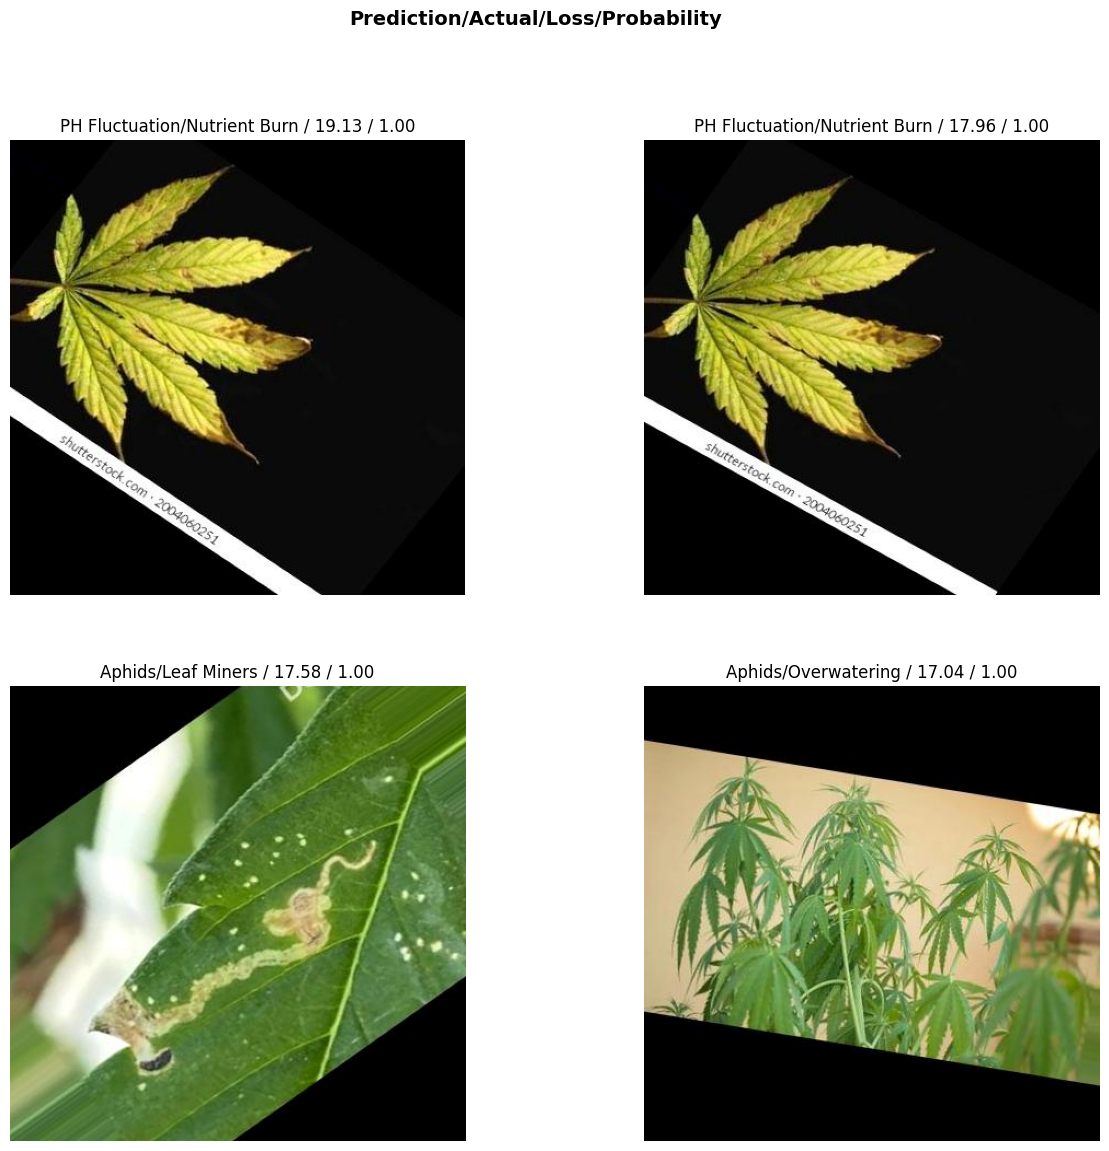

In [ ]:
interpret1.plot_top_losses(4, figsize=(15, 13))

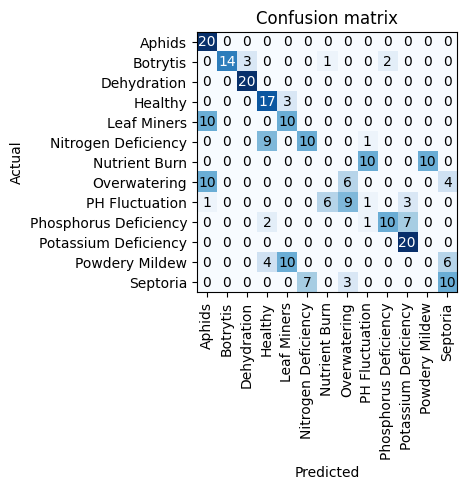

In [ ]:
interpret1.plot_confusion_matrix()